In [330]:
import math
import pandas_datareader as web
from main_funcs import get_and_update_data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from binance.enums import HistoricalKlinesType

# plt.style.use('fivethirtyeight')

In [331]:
range_number = 2*60

In [332]:
df = get_and_update_data("BTCUSDT", "12h", HistoricalKlinesType.SPOT, "Netherlands")
df = df[["open", "high", "low", "close","volume" ]]
df
# df = web.DataReader('AAPL',data_source="yahoo",start="2012-01-01",end="2019-12-17")
# df

Start Time: 2023-11-09T00:00:00.100000000
IP from 'Netherlands' . its OK!
start get data from binance: 2023-11-09 19:13:28.650945
Getting Data ...
finish get data from binance: 2023-11-09 19:13:29.909049
0 radif data gerefte shod az binance
etelaat jadidi mojod nist


,open,high,low,close,volume
open_time,,,,,
2017-08-17 03:30:00,4261.48,4485.39,4261.32,4427.30,145.708747
2017-08-17 15:30:00,4436.06,4485.39,4200.74,4285.08,649.441630
2017-08-18 03:30:00,4285.08,4371.52,4134.61,4340.31,720.722201
2017-08-18 15:30:00,4320.52,4340.31,3938.77,4108.37,479.166063
2017-08-19 03:30:00,4108.37,4184.69,3850.00,3957.60,298.518569
...,...,...,...,...,...
2023-11-07 03:30:00,35046.09,35053.41,34551.00,34627.83,11823.895260
2023-11-07 15:30:00,34627.83,35888.00,34523.06,35399.12,26864.841660
2023-11-08 03:30:00,35399.13,35437.09,35167.78,35330.79,10129.869410


In [333]:
# Get the number of rows and columns in the data set
df.shape

(4550, 5)

Text(0, 0.5, 'Close Price')

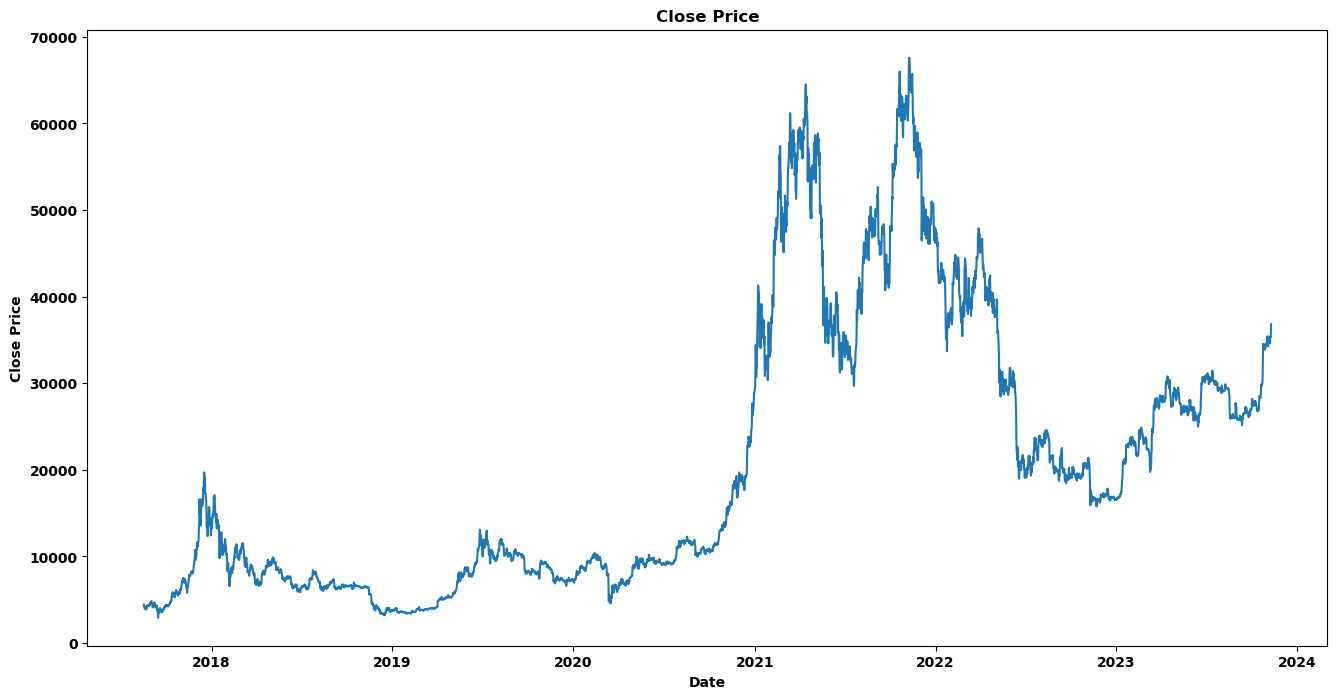

In [334]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df.close)
plt.xlabel('Date')
plt.ylabel('Close Price')

<Axes: xlabel='open_time'>

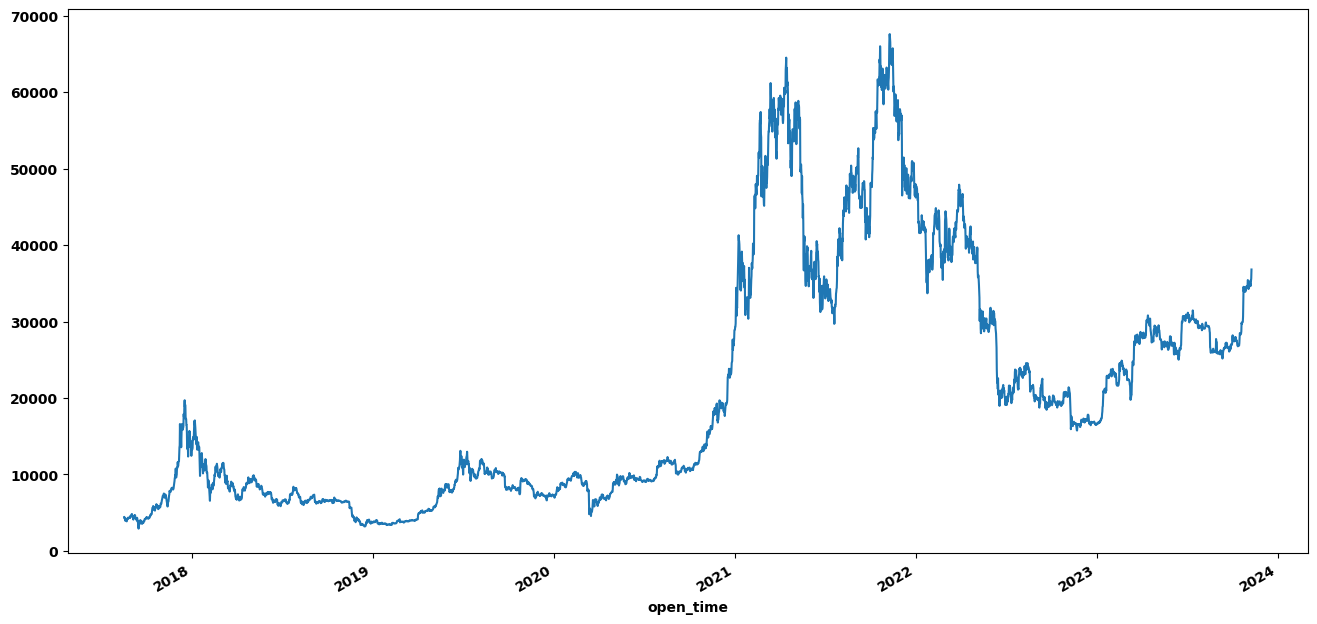

In [335]:
df['close'].plot(figsize=(16,8))

In [336]:
# Create a new dataframe with only close column
data = df.filter(['close'])
# Conver the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
trainiing_data_len = math.ceil(len(dataset) * 0.8)
trainiing_data_len

3640

In [337]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.02332087]
 [0.02112191]
 [0.02197586]
 ...
 [0.50114107]
 [0.50568573]
 [0.52394583]]


In [338]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:trainiing_data_len, :]
# Split the data into x_train and y_train data set
x_train = []
y_train = []

for i in range(range_number,len(train_data)):
    x_train.append(train_data[i-range_number:i,0])
    y_train.append(train_data[i,0])
    if i <= range_number+1:
        print(x_train)
        print(y_train)
        print()


[array([0.02332087, 0.02112191, 0.02197586, 0.01838967, 0.01605851,
       0.01887842, 0.01836122, 0.01804828, 0.01707141, 0.01696147,
       0.01464964, 0.01733256, 0.02039382, 0.01847688, 0.01983735,
       0.02160014, 0.02229993, 0.02105388, 0.02117819, 0.02193148,
       0.02171393, 0.02150737, 0.02147629, 0.02269297, 0.02241172,
       0.02579752, 0.02441942, 0.02529749, 0.02686732, 0.02792211,
       0.0286969 , 0.02962321, 0.02645511, 0.02401417, 0.02422847,
       0.02458533, 0.01907973, 0.01826196, 0.02053034, 0.02238033,
       0.0251891 , 0.02629678, 0.02620664, 0.02740755, 0.026726  ,
       0.02108665, 0.0217798 , 0.02071573, 0.01824155, 0.01872983,
       0.01967547, 0.01993739, 0.02197261, 0.01924548, 0.01411652,
       0.0158589 , 0.00868978, 0.00417497, 0.        , 0.01207558,
       0.01099419, 0.01230673, 0.00896824, 0.01207543, 0.01562141,
       0.0172554 , 0.01623493, 0.01532315, 0.01559729, 0.01516792,
       0.01462599, 0.01068387, 0.00960125, 0.01046555, 0.0135

In [339]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [340]:
# Reshape the data
print(x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(3520, 120)
(3520, 120, 1)


In [341]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [342]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [343]:
# Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

3520/3520 [==============================] - 98s 27ms/step - loss: 0.0014


In [344]:
# Create the testing dataset
# Create a new array containing scaled values from Index 1543 (trainiing_data_len) to 2003 (len(df))
test_data = scaled_data[trainiing_data_len - range_number: ,:]
# Create the dataset x_test and y_test
x_test = []
y_test = dataset[trainiing_data_len:,:]
for i in range(range_number, len(test_data)):
    x_test.append(test_data[i-range_number:i,0])

In [345]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [346]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [347]:
x_test.shape

(910, 120, 1)

In [348]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

29/29 [==============================] - 2s 18ms/step


In [349]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2 )
rmse

359.2944300309066

C:\Users\sajja\AppData\Local\Temp\ipykernel_37084\2515965001.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


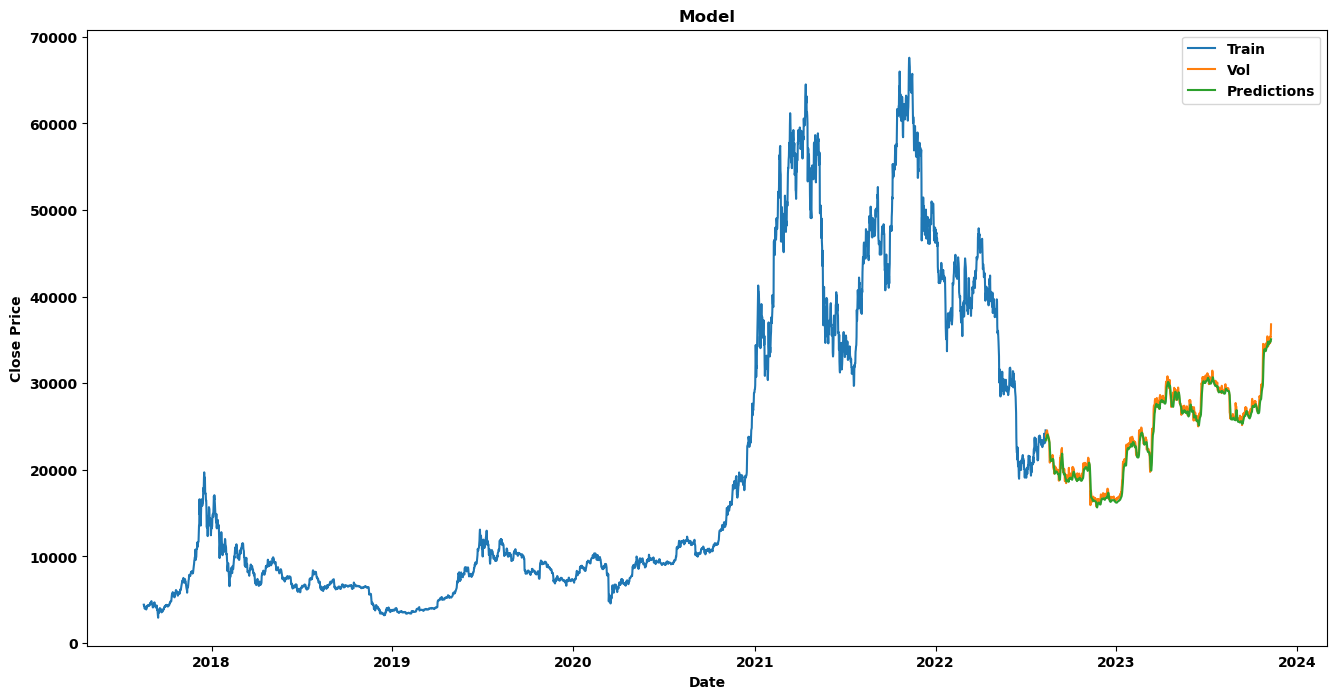

In [350]:
# Plot the data
train = data[:trainiing_data_len]
valid = data[trainiing_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.plot(train.close)
# valid = valid[-20:]
plt.plot(valid[['close','Predictions']])
plt.legend(['Train','Vol','Predictions'])

count:            100
count_true:       53
count_false:      47
result:           53.0 %


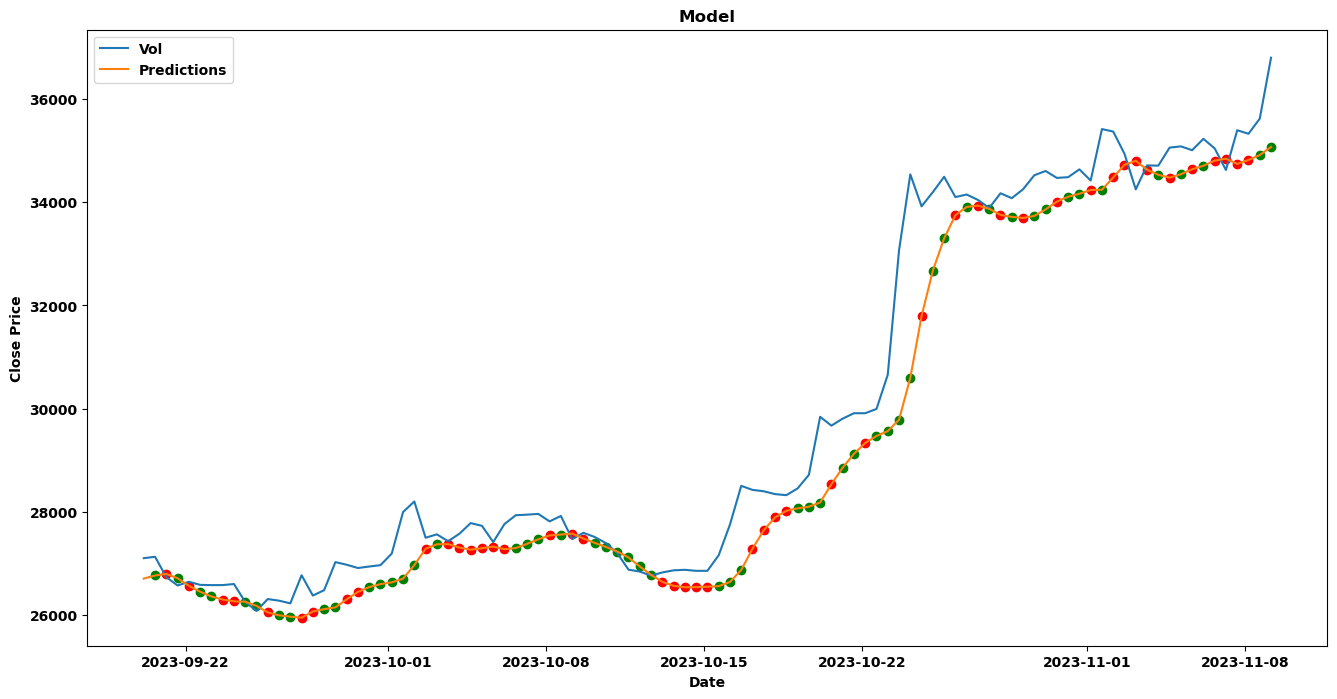

In [351]:
# show last results
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date")
plt.ylabel("Close Price")
# plt.plot(train.close)
last_valid = valid[-101:].copy()
plt.plot(last_valid[['close','Predictions']])
plt.legend(['Vol','Predictions'])

last_valid['taghir'] = last_valid.close - last_valid.shift(1).close
last_valid['taghir_pishbini'] = last_valid.Predictions - last_valid.shift(1).Predictions

count = 0
count_true = 0
count_false = 0
for index, row in last_valid.iterrows():
    count +=1
    if count == 1:
        continue
    if row.taghir > 0 and row.taghir_pishbini > 0:
        color = 'green'
        count_true += 1
    elif row.taghir < 0 and row.taghir_pishbini < 0:
        color = 'green'
        count_true += 1
    else:
        color = 'red'
        count_false += 1

    plt.scatter(x=index,y=row.Predictions, color=color)

print('count:           ',count-1)
print('count_true:      ',count_true)
print('count_false:     ',count_false)
print('result:          ',count_true/(count-1)*100,"%")

    # plt.vlines(last_valid.index[0],ymin=24000,ymax=36000)
# last_valid.index[0]

In [352]:
# Show the valid predicted prices
valid

,close,Predictions
open_time,,
2022-08-11 15:30:00,23934.39,23406.714844
2022-08-12 03:30:00,23672.99,23556.753906
2022-08-12 15:30:00,24403.68,23558.986328
2022-08-13 03:30:00,24435.91,23679.994141
2022-08-13 15:30:00,24441.38,23820.404297
...,...,...
2023-11-07 03:30:00,34627.83,34846.488281
2023-11-07 15:30:00,35399.12,34745.851562
2023-11-08 03:30:00,35330.79,34822.179688
